In [79]:
import pandas as pd
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pylab as plt

In [80]:
#Láy dữ liệu
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')
df_select = df[['MinTemp', 'MaxTemp','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainTomorrow']]

In [81]:
#Phân tích dữ liệu
df_select

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,19.5,22.4,92,84,20.7,20.9,Yes
1,19.5,25.6,83,73,22.4,24.8,Yes
2,21.6,24.5,88,86,23.5,23.0,Yes
3,20.2,22.8,83,90,21.4,20.9,Yes
4,19.7,25.7,88,74,22.5,25.5,Yes
...,...,...,...,...,...,...,...
3266,8.6,19.6,73,52,10.5,17.9,No
3267,9.3,19.2,78,53,11.0,18.7,No
3268,9.4,17.7,85,56,10.2,17.3,No
3269,10.1,19.3,56,35,12.4,19.0,No


In [82]:
df_select.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainTomorrow
0,19.5,22.4,92,84,20.7,20.9,Yes
1,19.5,25.6,83,73,22.4,24.8,Yes
2,21.6,24.5,88,86,23.5,23.0,Yes
3,20.2,22.8,83,90,21.4,20.9,Yes
4,19.7,25.7,88,74,22.5,25.5,Yes


In [83]:
df_select.columns

Index(['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [84]:
df_select.dtypes

MinTemp         float64
MaxTemp         float64
Humidity9am       int64
Humidity3pm       int64
Temp9am         float64
Temp3pm         float64
RainTomorrow     object
dtype: object

In [85]:
#Thống kê mô tả
df_select.describe()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,68.243962,54.698563,17.821461,21.543656
std,4.554710,4.483752,15.086127,16.279241,4.894316,4.297053
min,4.300000,11.700000,19.000000,10.000000,6.400000,10.200000
25%,11.000000,19.600000,58.000000,44.000000,13.800000,18.400000
50%,14.900000,22.800000,69.000000,56.000000,18.200000,21.300000
75%,18.800000,26.000000,80.000000,64.000000,21.700000,24.500000
max,27.600000,45.800000,100.000000,99.000000,36.500000,44.700000


In [67]:
#Phân bố 'RainTomorrow':
df['RainTomorrow'].value_counts()

No     2422
Yes     849
Name: RainTomorrow, dtype: int64

In [86]:
#Tương quan giữa các đặc trưng
df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']].corr()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.771005,0.053946,0.273269,0.939307,0.753147
MaxTemp,0.771005,1.000000,-0.185382,-0.150741,0.858639,0.960805
Humidity9am,0.053946,-0.185382,1.000000,0.657933,-0.145944,-0.155192
Humidity3pm,0.273269,-0.150741,0.657933,1.000000,0.131855,-0.212696
Temp9am,0.939307,0.858639,-0.145944,0.131855,1.000000,0.828457
Temp3pm,0.753147,0.960805,-0.155192,-0.212696,0.828457,1.000000


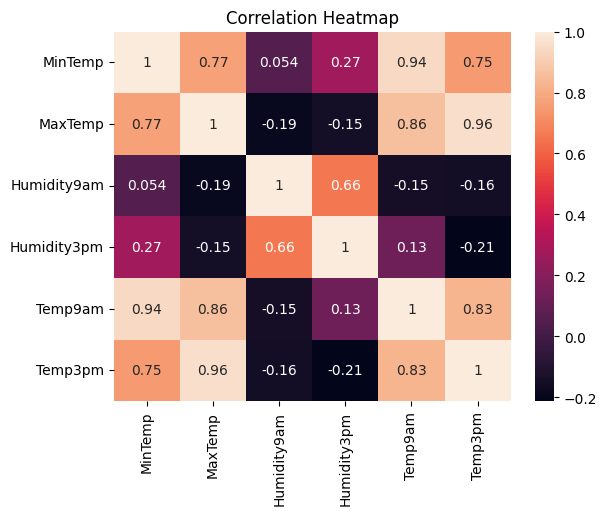

In [87]:
#Biểu đồ tương quan
sns.heatmap(df[['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

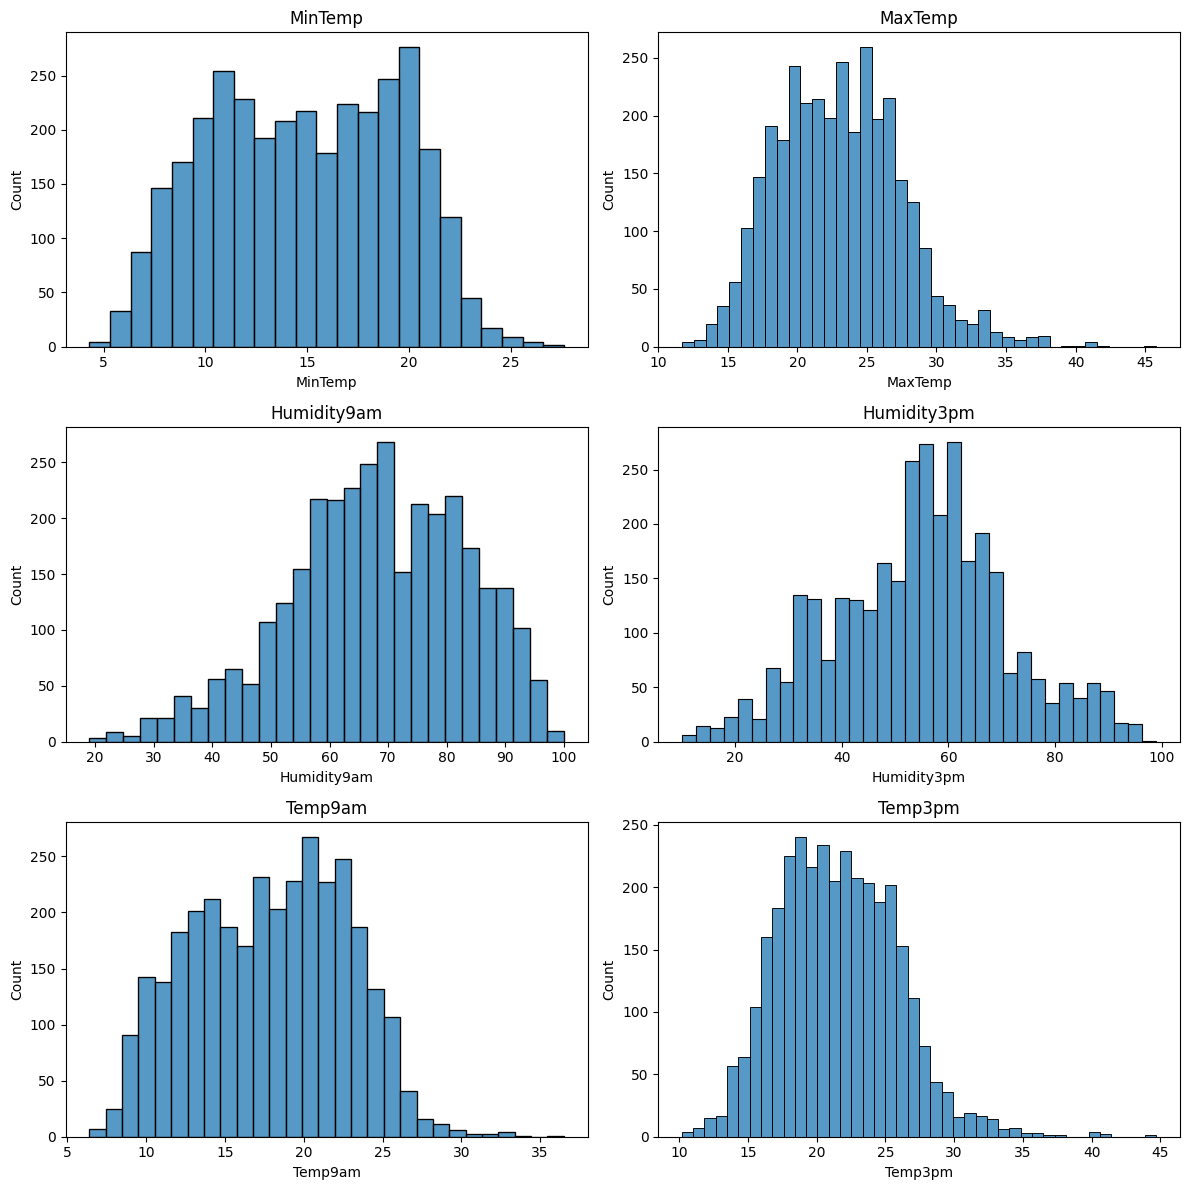

In [88]:
#Biểu đồ phân bố
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

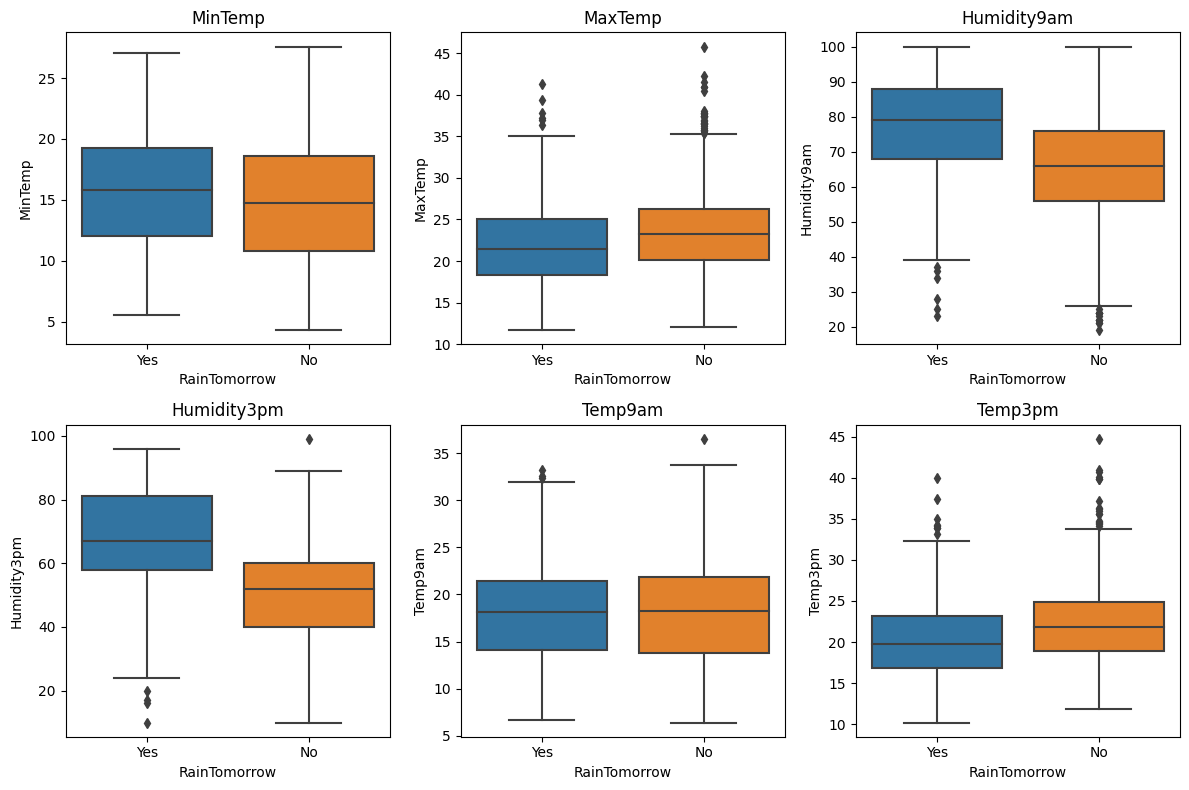

In [89]:
#Biểu đồ tương quan đặc trưng với kết quả
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']):
    sns.boxplot(data=df, x='RainTomorrow', y=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [90]:
#Xữ lý dữ liệu
df_select['RainTomorrow'].replace(['No', 'Yes'], [0,1], inplace=True)
features = df_select.drop(columns='RainTomorrow', axis=1)
Y = df_select['RainTomorrow']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

<ipython-input-90-738c8392a3e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['RainTomorrow'].replace(['No', 'Yes'], [0,1], inplace=True)


In [92]:
#Train mô hình
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
model = grid_search.fit(x_train,y_train)
pred = model.predict(x_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       471
           1       0.78      0.46      0.58       184

    accuracy                           0.81       655
   macro avg       0.80      0.71      0.73       655
weighted avg       0.81      0.81      0.80       655


 F1:
 0.5802047781569967

 Precision score is:
 0.7798165137614679

 Recall score is:
 0.46195652173913043

 Confusion Matrix:



<Axes: >

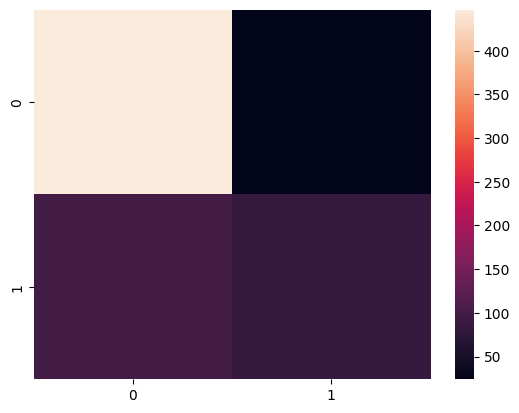

In [93]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
#Đánh giá model

print("Classification Report is:\n",classification_report(y_test,pred))
print("\n F1:\n",f1_score(y_test,pred))
print("\n Precision score is:\n",precision_score(y_test,pred))
print("\n Recall score is:\n",recall_score(y_test,pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,pred))

In [94]:
#Tạo weight
best_model = grid_search.best_estimator_
best_model.fit(features, Y)  # Huấn luyện lại trên toàn bộ dữ liệu
weights_path = "lab6.pkl"
with open(weights_path, "wb") as f:
    pickle.dump(best_model, f)